# Notebook for simulating photons produced in single voxels of SingleModule
In every voxel, produce NUMBER of photons with isotropically distributed directions into the half-sphere directing to the LCM readout plane.
Calculate the LCM detection acceptance (assuming a constant single photon detection efficiency across the whole LCM).

### Imports

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from numpy import random
import seaborn

### Produce random numbers for two angles (phi and theta)

Text(0, 0.5, 'Entries [-]')

/home/roman/software/anaconda3/envs/larpix-analysis-38/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/roman/software/anaconda3/envs/larpix-analysis-38/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


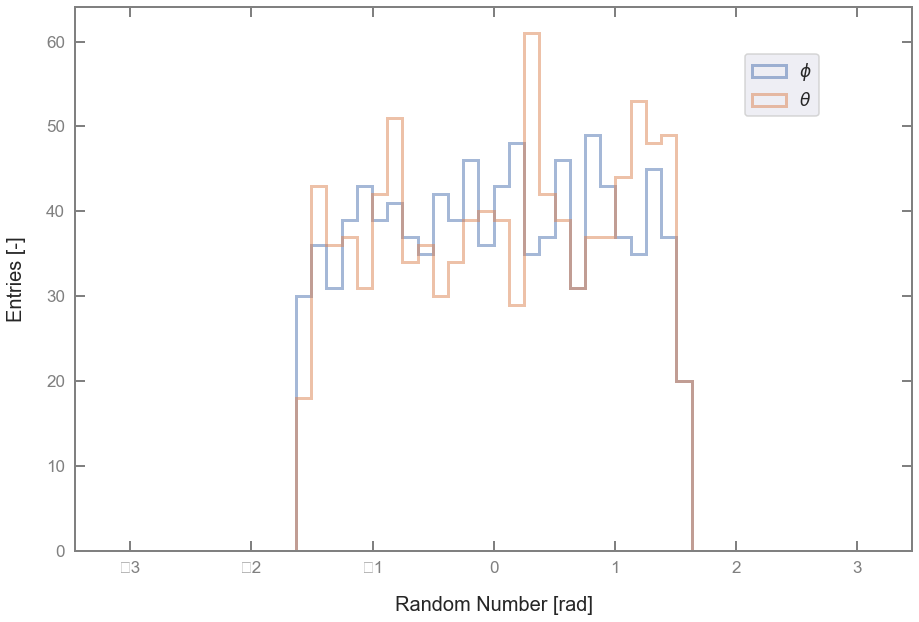

In [2]:
# Set seed
np.random.seed(seed=1) # seed=number or seed=None

# Simulate n photons isotropically distributed to one half-sphere
n_photons = 1000
phi   = np.pi*random.rand(n_photons) - 0.5*np.pi
theta = np.pi*random.rand(n_photons) - 0.5*np.pi

n_bins = 50
x_min = -np.pi
x_max = np.pi
axis_labels = ['Random Number [rad]', 'Entries [-]']

seaborn.set(rc={'figure.figsize':(15, 10),})
seaborn.set_context('talk') # or paper

# Define parameters of the frame
fig = plt.figure() # plt.figure(figsize=(width,height))
ax = fig.add_subplot(111)
ax.patch.set_alpha(0.0)
ax.spines['bottom'].set_color('0.5') #'black', ...
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_visible(True)
ax.spines['top'].set_color('0.5')
ax.spines['top'].set_linewidth(2)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_color('0.5')
ax.spines['right'].set_linewidth(2)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_color('0.5')
ax.spines['left'].set_linewidth(2)
ax.spines['left'].set_visible(True)

# Ticks, grid and ticks labels
ax.tick_params(direction='in', length=10, width=2,                 # direction, length and width of the ticks (in, out, inout)
               colors='0.5',                                       # color of the ticks ('black', '0.5')
               bottom=True, top=True, right=True, left=True,       # whether to draw the respective ticks
               zorder = 10.,                                       # tick and label zorder
               pad = 10.,                                          # distance between ticks and tick labels
               labelsize = 17,                                     # size of the tick labels
               labelright=False, labeltop=False)                   # wether to draw the tick labels on axes

n0, bins0, patches0 = plt.hist( phi,\
                                bins=n_bins,\
                                range=[x_min,x_max],\
                                histtype='step',\
                                label='$\phi$',\
                                stacked=False,\
                                linewidth=3,\
                                alpha=0.5) # histtype='step' or 'stepfilled', label='track_length'
n1, bins1, patches1 = plt.hist( theta,\
                                bins=n_bins,\
                                range=[x_min,x_max],\
                                histtype='step',\
                                label='$\\theta$',\
                                stacked=False,\
                                linewidth=3,\
                                alpha=0.5) # histtype='step' or 'stepfilled', label='track_length'

# Legend
plt.legend(loc=[0.8,0.8], prop={'size': 17}) # loc='upper right'

# Axis labels
plt.xlabel(axis_labels[0], fontsize=20, labelpad=20)
plt.ylabel(axis_labels[1], fontsize=20, labelpad=20)

# Logarithmic y axis
#plt.ylim(bottom=0.9) #, top=200)
#plt.yscale('linear') # linear, log

# Save figure
#plt.savefig(save_name, dpi=400) # bbox_inches='tight'
#plt.close()

### Define voxelisation

In [3]:
n_voxels_x = 10#70
n_voxels_y = 10#70
n_voxels_z = 10#70
pitch_x = 30#4.434
pitch_y = 30#4.434
pitch_z = 30#4.434
pixels_x_min = - pitch_x * n_voxels_x/2. #155.19
pixels_x_max =   pitch_x * n_voxels_x/2. #155.19
pixels_y_min = - pitch_y * n_voxels_y/2. #155.19
pixels_y_max =   pitch_y * n_voxels_y/2. #155.19
pixels_z_min = 0
pixels_z_max = n_voxels_z*pitch_z #*10 # factor 10 for correction... TODO: CHANGE THIS FOR NEXT PRODUCTION!! # TODO: WHAT IS THE MAX DRIFT LENGTH?
print(' Voxelisation [mm]: ')
print('     x: (', n_voxels_x, 'voxels ) from', pixels_x_min, '..', pixels_x_max)
print('     y: (', n_voxels_y, 'voxels ) from', pixels_y_min, '..', pixels_y_max)
print('     z: (', n_voxels_z, 'voxels ) from', pixels_z_min, '..', pixels_z_max)
#pixels_z_min = - pitch_z * n_voxels_z/2. #155.19
#pixels_z_max =   pitch_z * n_voxels_z/2. #155.19
#pixels_y_min = -155.19
#pixels_y_max = 155.19

 Voxelisation [mm]: 
     x: ( 10 voxels ) from -150.0 .. 150.0
     y: ( 10 voxels ) from -150.0 .. 150.0
     z: ( 10 voxels ) from 0 .. 300


### Define LCM boundaries

In [4]:
LCM_y_min = pixels_y_min
LCM_y_max = pixels_y_max
LCM_z_min = pixels_z_min
LCM_z_max = pixels_z_max

### Loop over all voxels and calculate LCM acceptance

In [5]:
# Initialize 3 dimensional array for the acceptance of every voxel
acceptance = np.zeros((n_voxels_x,n_voxels_y,n_voxels_z))

# Loop over all bins in x, y and z direction
for x_bin in range(n_voxels_x):
    bin_middle_x = pixels_x_min + (x_bin+0.5)*pitch_x
    #print(' bin_middle_x: ', bin_middle_x)
    for y_bin in range(n_voxels_y):
        bin_middle_y = pixels_y_min + (y_bin+0.5)*pitch_y
        #print(' bin_middle_y: ', bin_middle_y)
        for z_bin in range(n_voxels_z):
            bin_middle_z = pixels_z_min + (z_bin+0.5)*pitch_z
            #print(' bin_middle_z: ', bin_middle_z)
            
            #y_LCM_list = []
            #z_LCM_list = []
            
            counter_nPhotons_hit_LCM = 0
            
            # Now at specific bin: Loop over all simulated photons
            for photon in range(n_photons):
                y_LCM = bin_middle_y+np.tan(phi[photon])*(bin_middle_x-pixels_x_min)
                z_LCM = bin_middle_z+np.tan(theta[photon])*(bin_middle_x-pixels_x_min)
                #print(' phi: ', phi[photon]*180./np.pi, ' \t theta: ', theta[photon]*180./np.pi,\
                #      ' \t y_LCM: ', y_LCM,\
                #      ' \t z_LCM: ', z_LCM)
                if y_LCM > pixels_y_min and y_LCM < pixels_y_max and z_LCM > pixels_z_min and z_LCM < pixels_z_max:
                    #y_LCM_list.append(y_LCM)
                    #z_LCM_list.append(z_LCM)
                    counter_nPhotons_hit_LCM += 1
            acceptance[x_bin][y_bin][z_bin] = counter_nPhotons_hit_LCM/n_photons
            #print('Acceptance: ', counter_nPhotons_hit_LCM, '/', n_photons, 'arrived on LCM (', counter_nPhotons_hit_LCM/n_photons, ')')
np.set_printoptions(precision=2)
print(' Acceptance: ')
print(acceptance)

 Acceptance: 
[[[0.55 0.65 0.68 0.68 0.69 0.69 0.69 0.67 0.63 0.52]
  [0.66 0.79 0.82 0.82 0.83 0.83 0.82 0.8  0.76 0.62]
  [0.68 0.81 0.84 0.85 0.86 0.86 0.85 0.83 0.79 0.64]
  [0.69 0.82 0.85 0.86 0.87 0.87 0.86 0.84 0.79 0.65]
  [0.69 0.82 0.85 0.86 0.87 0.86 0.86 0.83 0.79 0.65]
  [0.68 0.81 0.85 0.86 0.86 0.86 0.85 0.83 0.79 0.65]
  [0.69 0.82 0.85 0.86 0.87 0.87 0.86 0.84 0.8  0.65]
  [0.68 0.81 0.84 0.85 0.86 0.85 0.85 0.83 0.79 0.65]
  [0.65 0.78 0.8  0.81 0.82 0.82 0.81 0.79 0.76 0.62]
  [0.54 0.65 0.67 0.68 0.68 0.68 0.68 0.66 0.63 0.51]]

 [[0.32 0.4  0.45 0.46 0.46 0.46 0.45 0.42 0.39 0.3 ]
  [0.39 0.48 0.55 0.55 0.56 0.56 0.55 0.52 0.47 0.37]
  [0.43 0.54 0.6  0.61 0.62 0.62 0.61 0.57 0.52 0.41]
  [0.45 0.56 0.63 0.64 0.65 0.65 0.64 0.6  0.54 0.43]
  [0.46 0.57 0.64 0.65 0.66 0.65 0.64 0.6  0.55 0.43]
  [0.46 0.56 0.63 0.64 0.65 0.65 0.63 0.6  0.54 0.43]
  [0.45 0.56 0.62 0.63 0.64 0.64 0.62 0.59 0.53 0.42]
  [0.43 0.54 0.6  0.61 0.62 0.62 0.6  0.57 0.51 0.41]
  [0.39 0.48

Done.


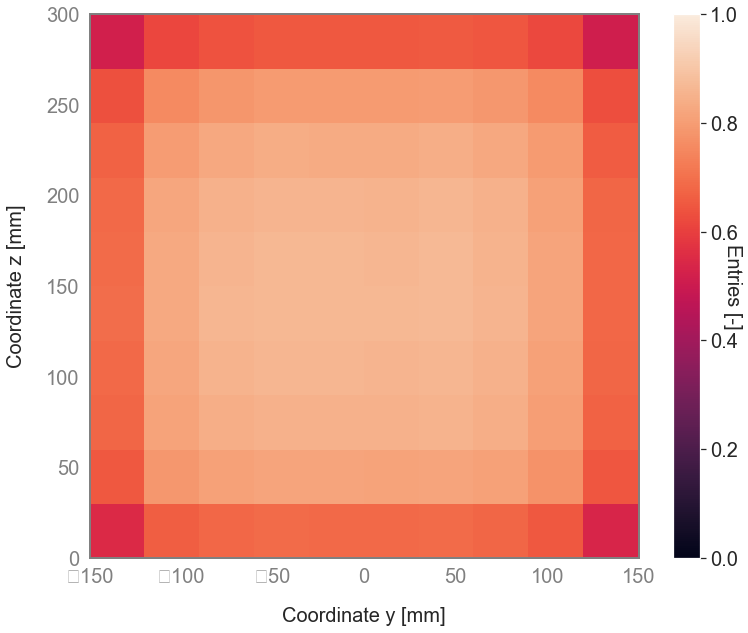

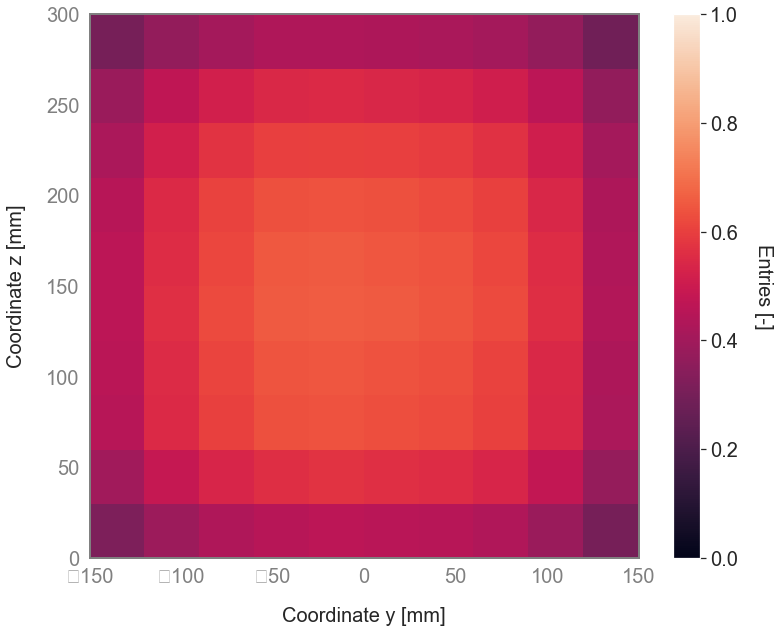

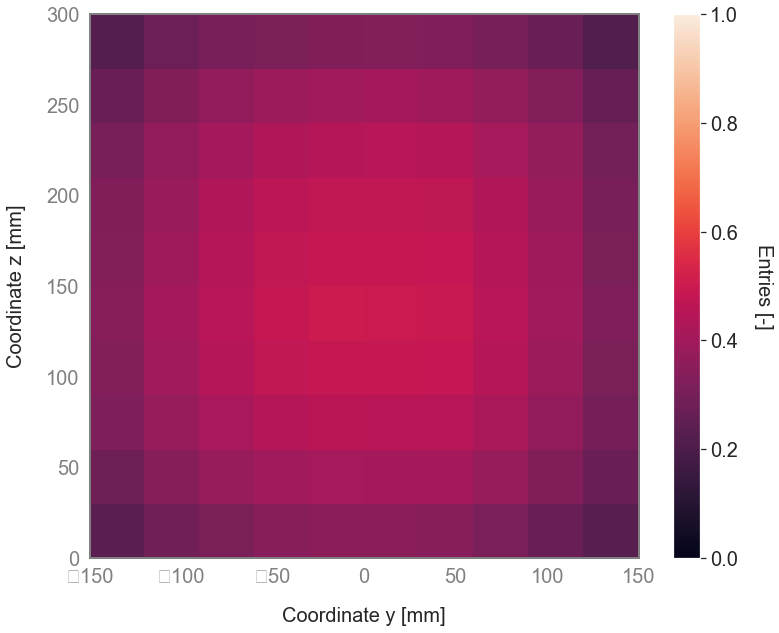

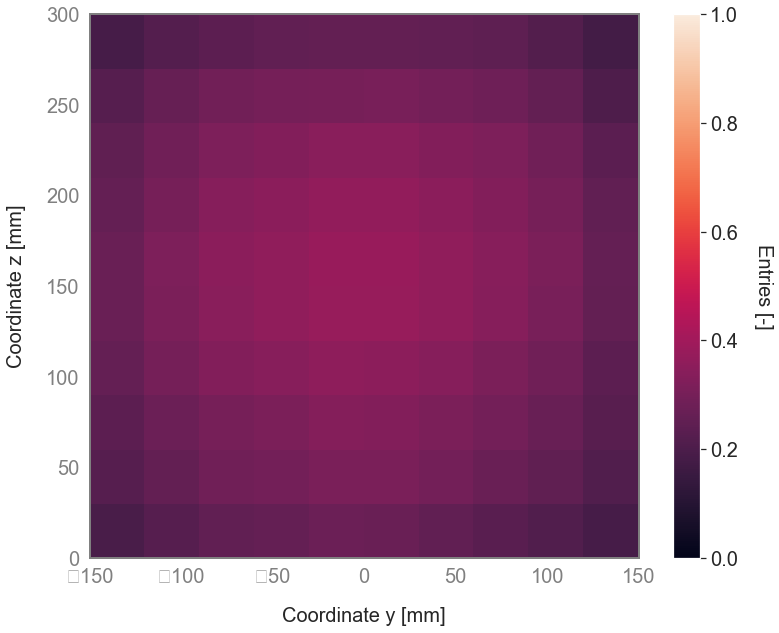

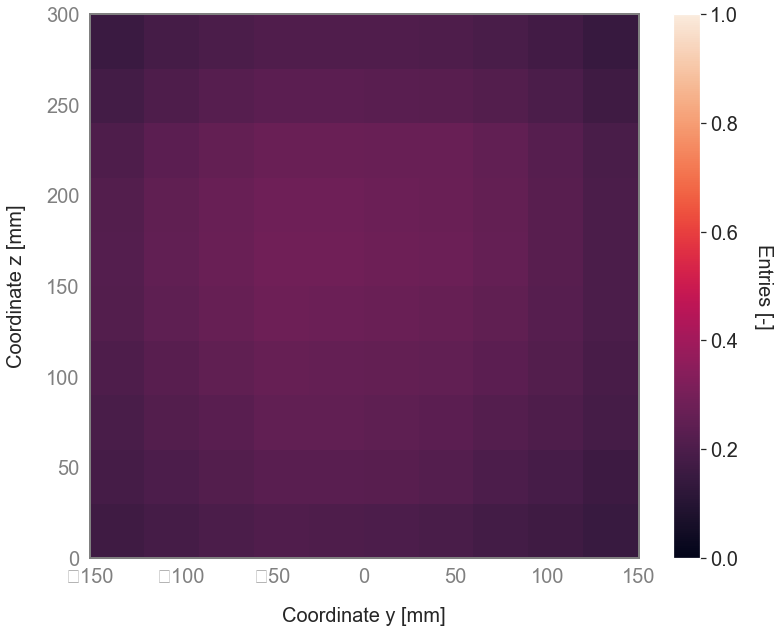

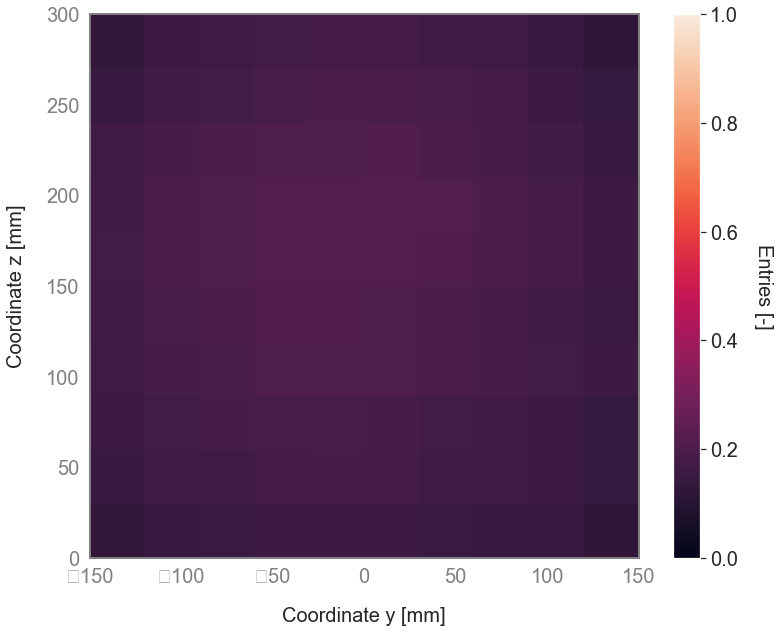

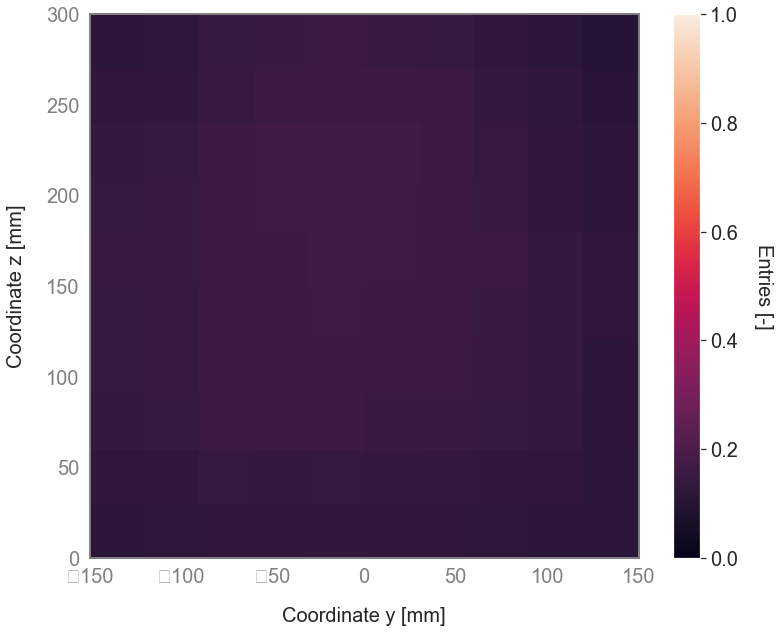

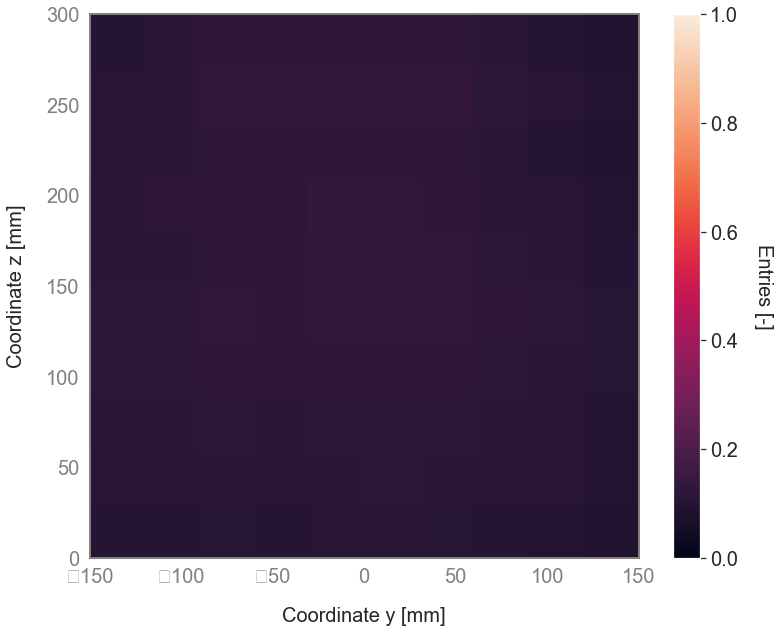

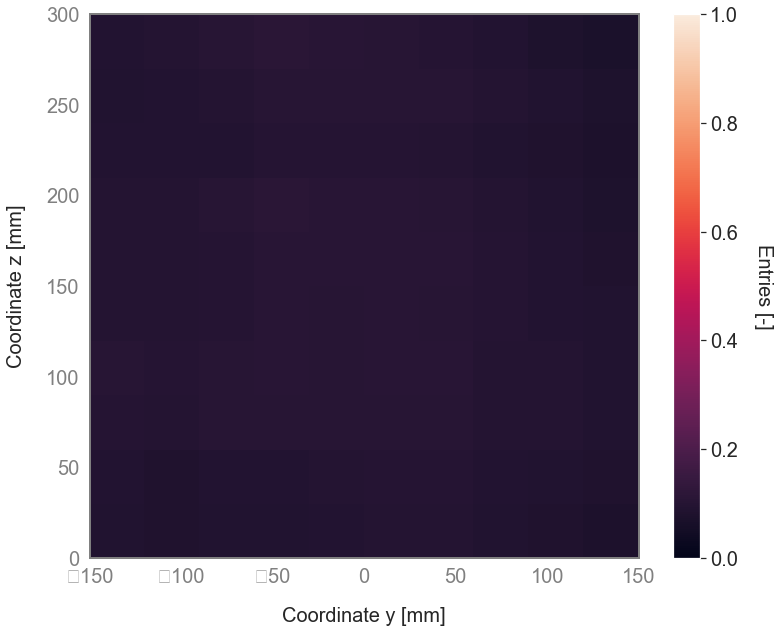

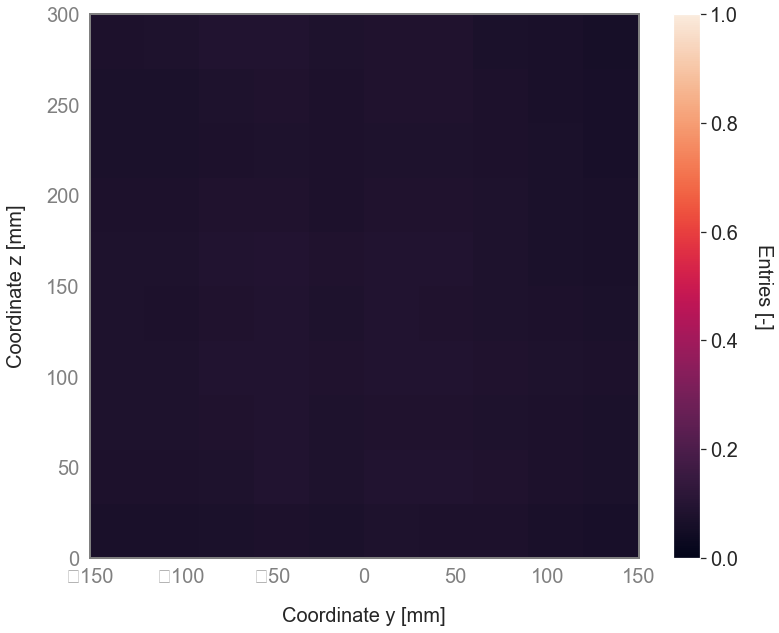

In [6]:
# Plot 2D histograms for x_slices (at max. the first 10, otherwise it consumes quite some time...)
for x_slice in range(min(n_voxels_x,10)):

    seaborn.set(rc={'figure.figsize':(12.3, 10),})

    fig, ax = plt.subplots()

    # Define parameters of the frame
    #fig = plt.figure() # plt.figure(figsize=(width,height))
    #fig.patch.set_facecolor('white')
    #fig.patch.set_alpha(0.0)
    #ax = fig.add_subplot(111)
    #ax.patch.set_facecolor('#ababab') # #ababab
    ax.patch.set_alpha(0.0)
    ax.spines['bottom'].set_color('0.5') #'black', ...
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['bottom'].set_visible(True)
    ax.spines['top'].set_color('0.5')
    ax.spines['top'].set_linewidth(2)
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_color('0.5')
    ax.spines['right'].set_linewidth(2)
    ax.spines['right'].set_visible(True)
    ax.spines['left'].set_color('0.5')
    ax.spines['left'].set_linewidth(2)
    ax.spines['left'].set_visible(True)

    # Ticks, grid and ticks labels
    ax.tick_params(direction='in', length=10, width=2,                 # direction, length and width of the ticks (in, out, inout)
                   colors='0.5',                                       # color of the ticks ('black', '0.5')
                   bottom=True, top=True, right=True, left=True,       # whether to draw the respective ticks
                   zorder = 10.,                                       # tick and label zorder
                   pad = 10.,                                          # distance between ticks and tick labels
                   labelsize = 17,                                     # size of the tick labels
                   labelright=False, labeltop=False)                   # wether to draw the tick labels on axes
                   #labelrotation=45.                                  # rotation of the labels
                   #grid_color='black',                                # grid
                   #grid_alpha=0.0,
                   #grid_linewidth=1.0,
    # colors='black','0.5'

    y_bins = np.linspace(pixels_y_min,pixels_y_max,n_voxels_y+1)
    z_bins = np.linspace(pixels_z_min,pixels_z_max,n_voxels_z+1)
    axis_labels = ['Coordinate y [mm]','Coordinate z [mm]','Entries [-]']

    y_coords        = []
    z_coords        = []
    acceptance_vals = []
    
    for y_bin in range(n_voxels_y):
        for z_bin in range(n_voxels_z):
            y_coords.append(pixels_y_min + (y_bin+0.5)*pitch_y)
            z_coords.append(pixels_z_min + (z_bin+0.5)*pitch_z)
            acceptance_vals.append(acceptance[x_slice][y_bin][z_bin])

    plt.hist2d(y_coords, z_coords, weights=acceptance_vals, bins=[y_bins,z_bins], vmin=0, vmax=1)#, cmap=plt.cm.viridis), weights=weights_list
    # Color maps: viridis, plasma, magma, inferno

    # Colorbar
    #help(colorbar)
    colorbar = plt.colorbar()
    colorbar.set_label(axis_labels[2], rotation=270, fontsize=20)
    colorbar.ax.tick_params(labelsize=20)

    # Axes
    plt.xlabel(axis_labels[0], fontsize=20, labelpad=20)
    plt.ylabel(axis_labels[1], fontsize=20, labelpad=20)
    plt.tick_params(labelsize=20)

    # Change label offset of axes
    from matplotlib import rcParams
    rcParams['axes.labelpad'] = 35

    #ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
    #ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))

    # Save figure
    save_name = 'simulated_LCMacceptances/h2_acceptance_xSlice_' +str(x_slice) + '_.png'
    #plt.savefig(save_name, dpi=400) # bbox_inches='tight'
    #plt.close()
    
print('Done.')

In [7]:
# Obtain overall acceptance for single x_slices
acceptance_in_xSlices = []
for x_slice in range(min(n_voxels_x,10)):
    accept = 0.
    for y_bin in range(n_voxels_y):
        for z_bin in range(n_voxels_z):
            accept += acceptance[x_slice][y_bin][z_bin]
    acceptance_in_xSlices.append(accept/(n_voxels_y*n_voxels_z))
    print('Acceptance: ', accept/(n_voxels_y*n_voxels_z))

Acceptance:  0.7656200000000001
Acceptance:  0.52164
Acceptance:  0.3798599999999998
Acceptance:  0.2900499999999998
Acceptance:  0.2253500000000001
Acceptance:  0.17944
Acceptance:  0.14280000000000004
Acceptance:  0.11582000000000006
Acceptance:  0.09603
Acceptance:  0.07907999999999998


Done.


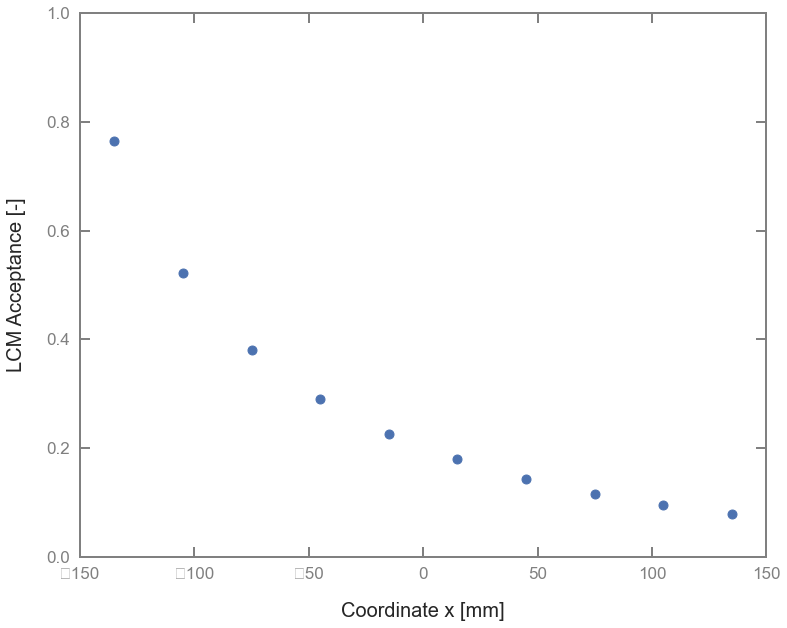

In [14]:
# Size
seaborn.set(rc={'figure.figsize':(12.3, 10),})
seaborn.set_context('talk') # or paper

# Define parameters of the frame
fig = plt.figure() # plt.figure(figsize=(width,height))
ax = fig.add_subplot(111)
ax.patch.set_alpha(0.0)
ax.spines['bottom'].set_color('0.5') #'black', ...
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_visible(True)
ax.spines['top'].set_color('0.5')
ax.spines['top'].set_linewidth(2)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_color('0.5')
ax.spines['right'].set_linewidth(2)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_color('0.5')
ax.spines['left'].set_linewidth(2)
ax.spines['left'].set_visible(True)

# Ticks, grid and ticks labels
ax.tick_params(direction='in', length=10, width=2,                 # direction, length and width of the ticks (in, out, inout)
               colors='0.5',                                       # color of the ticks ('black', '0.5')
               bottom=True, top=True, right=True, left=True,       # whether to draw the respective ticks
               zorder = 10.,                                       # tick and label zorder
               pad = 10.,                                          # distance between ticks and tick labels
               labelsize = 17,                                     # size of the tick labels
               labelright=False, labeltop=False)                   # wether to draw the tick labels on axes
# Axis limits
ax.set_xlim((pixels_x_min,pixels_x_max))
ax.set_ylim((0,1))

# Axis labels
axis_labels = ['Coordinate x [mm]','LCM Acceptance [-]']
plt.xlabel(axis_labels[0], fontsize=20, labelpad=20)
plt.ylabel(axis_labels[1], fontsize=20, labelpad=20)

x_vals = []
for x_bin in range(n_voxels_x):
    x_vals.append(pixels_x_min + (x_bin+0.5)*pitch_x)
#print(x_vals)
#print(acceptance_in_xSlices)

x_err = [0. for i in range(n_voxels_x)]
y_err = [0. for i in range(n_voxels_x)]
plt.errorbar(x_vals, acceptance_in_xSlices, xerr=x_err, yerr=y_err, fmt='o', label='series name')

# Legend
#plt.legend(loc=[0.75,0.8], prop={'size': 17}) # loc='upper right'

# Save figure
save_name = 'simulated_LCMacceptances/TGraph_acceptance_vs_xSlice_.png'
plt.savefig(save_name, dpi=400) # bbox_inches='tight'
#plt.close()

# Save numbers to file
f = open('simulated_LCMacceptances/LCM_acceptances.txt', 'w')
f.write('x_bin_middle [mm],normalized acceptance [-]\n')
for entry in range(len(x_vals)):
    value_string = str(x_vals[entry]) + ',' + str(acceptance_in_xSlices[entry]) +'\n'
    f.write(value_string)
f.close()

print('Done.')

Done.


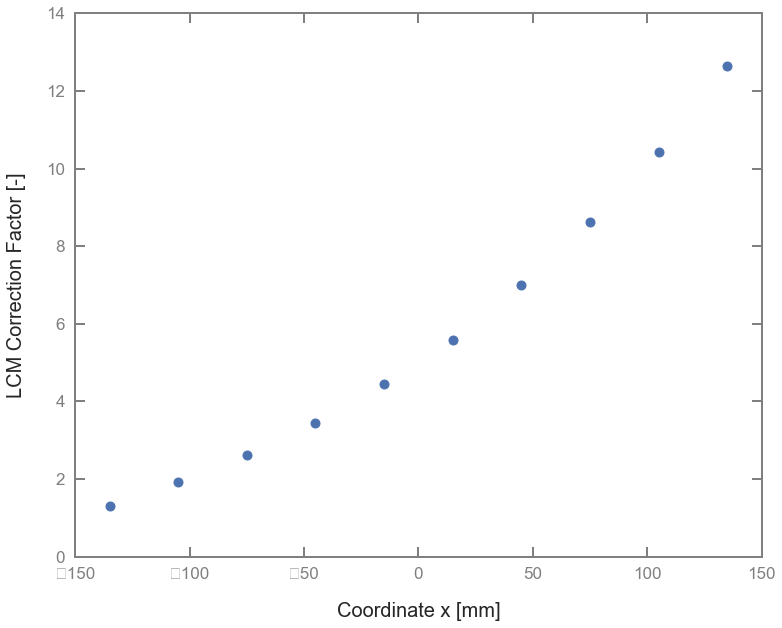

In [20]:
# Size
seaborn.set(rc={'figure.figsize':(12.3, 10),})
seaborn.set_context('talk') # or paper

# Define parameters of the frame
fig = plt.figure() # plt.figure(figsize=(width,height))
ax = fig.add_subplot(111)
ax.patch.set_alpha(0.0)
ax.spines['bottom'].set_color('0.5') #'black', ...
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_visible(True)
ax.spines['top'].set_color('0.5')
ax.spines['top'].set_linewidth(2)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_color('0.5')
ax.spines['right'].set_linewidth(2)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_color('0.5')
ax.spines['left'].set_linewidth(2)
ax.spines['left'].set_visible(True)

# Ticks, grid and ticks labels
ax.tick_params(direction='in', length=10, width=2,                 # direction, length and width of the ticks (in, out, inout)
               colors='0.5',                                       # color of the ticks ('black', '0.5')
               bottom=True, top=True, right=True, left=True,       # whether to draw the respective ticks
               zorder = 10.,                                       # tick and label zorder
               pad = 10.,                                          # distance between ticks and tick labels
               labelsize = 17,                                     # size of the tick labels
               labelright=False, labeltop=False)                   # wether to draw the tick labels on axes
# Axis limits
ax.set_xlim((pixels_x_min,pixels_x_max))
#ax.set_ylim((y_min,y_max))
ax.set_ylim(0,14)

# Axis labels
axis_labels = ['Coordinate x [mm]','LCM Correction Factor [-]']
plt.xlabel(axis_labels[0], fontsize=20, labelpad=20)
plt.ylabel(axis_labels[1], fontsize=20, labelpad=20)

plt.errorbar(x_vals, 1./np.array(acceptance_in_xSlices), xerr=x_err, yerr=y_err, fmt='o', label='series name')

# Legend
#plt.legend(loc=[0.75,0.8], prop={'size': 17}) # loc='upper right'

# Save figure
save_name = 'simulated_LCMacceptances/TGraph_correctionFactor_vs_xSlice_.png'
plt.savefig(save_name, dpi=400) # bbox_inches='tight'
#plt.close()

# Save numbers to file
#f = open('simulated_LCMacceptances/LCM_acceptances.txt', 'w')
#f.write('x_bin_middle [mm],normalized acceptance [-]\n')
#for entry in range(len(x_vals)):
#    value_string = str(x_vals[entry]) + ',' + str(acceptance_in_xSlices[entry]) +'\n'
#    f.write(value_string)
#f.close()

print('Done.')